In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Load the CSV
df = pd.read_csv("tp-stylometry.csv", index_col=0)

# Assign Lynch/Non-Lynch labels
df['lynch_involved'] = ['Lynch' if i <= 8 else 'Non-Lynch' for i in range(1, len(df)+1)]

# Display the first few rows
print(df.head())

                    word_count  unique_words  lexical_diversity  \
cleaned_tp0201.txt       16481          2584           0.156787   
cleaned_tp0202.txt        8391          1775           0.211536   
cleaned_tp0203.txt        8340          1647           0.197482   
cleaned_tp0204.txt        7174          1541           0.214803   
cleaned_tp0205.txt        8373          1824           0.217843   

                    avg_word_length  hapax_legomena  avg_sentence_length  \
cleaned_tp0201.txt         3.603604            1457            10.431013   
cleaned_tp0202.txt         3.647003            1070             7.916981   
cleaned_tp0203.txt         3.547122             962             9.641618   
cleaned_tp0204.txt         3.601617             928             8.685230   
cleaned_tp0205.txt         3.776424            1106             9.547320   

                    prop_nouns  prop_verbs  prop_adjectives  prop_adverbs  \
cleaned_tp0201.txt        3014        1743             1311    

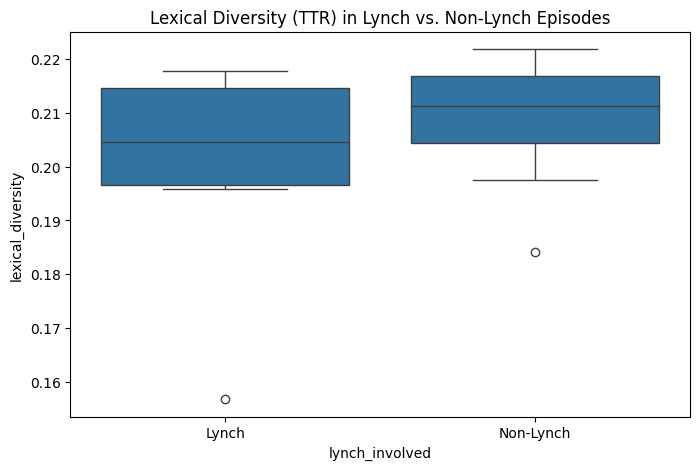

Mann-Whitney U-test for TTR: U=39.0, p=0.2667


In [3]:
# Boxplot of Lexical Diversity by group
plt.figure(figsize=(8, 5))
sns.boxplot(x='lynch_involved', y='lexical_diversity', data=df)
plt.title("Lexical Diversity (TTR) in Lynch vs. Non-Lynch Episodes")
plt.show()

# Mann-Whitney U-test (non-parametric)
lynch_ttr = df[df['lynch_involved'] == 'Lynch']['lexical_diversity']
non_lynch_ttr = df[df['lynch_involved'] == 'Non-Lynch']['lexical_diversity']
u_stat, p_val = stats.mannwhitneyu(lynch_ttr, non_lynch_ttr)
print(f"Mann-Whitney U-test for TTR: U={u_stat}, p={p_val:.4f}")

/tmp/ipykernel_16999/2442862073.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(txt, (df_pca['PC1'][i], df_pca['PC2'][i]), fontsize=8)


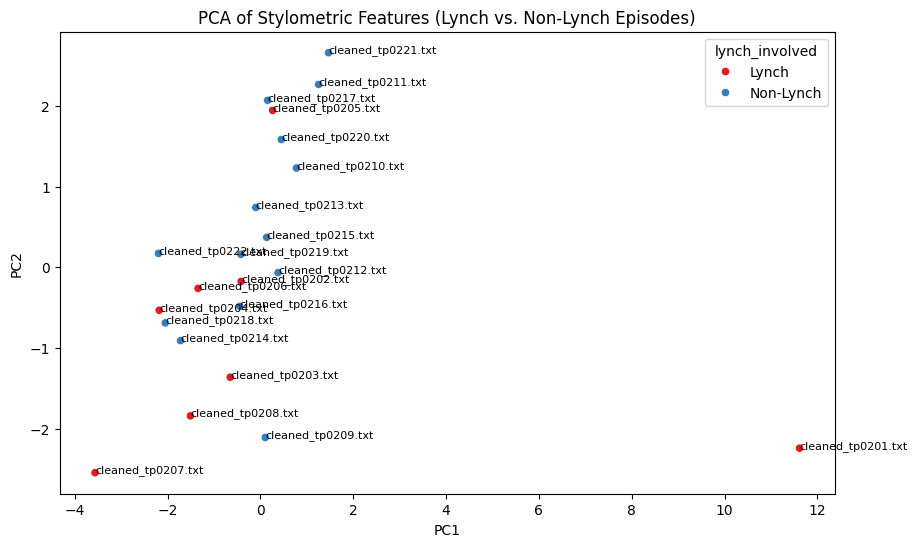

In [4]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize features
X = df.drop(columns=['lynch_involved'])
X_scaled = StandardScaler().fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)
pca_results = pca.fit_transform(X_scaled)
df_pca = pd.DataFrame(pca_results, columns=['PC1', 'PC2'], index=df.index)
df_pca['lynch_involved'] = df['lynch_involved']

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='lynch_involved', data=df_pca, palette='Set1')
plt.title("PCA of Stylometric Features (Lynch vs. Non-Lynch Episodes)")
for i, txt in enumerate(df_pca.index):
    plt.annotate(txt, (df_pca['PC1'][i], df_pca['PC2'][i]), fontsize=8)
plt.show()